# Explore here

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

np.random.seed(7)

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [3]:
df=pd.read_csv("/workspaces/machine-learning-python-template-ds-Julio/src/Aquifer_Petrignano (1).csv")

df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


In [4]:
# removing old rows / unusefull columns 

df= df[df.Rainfall_Bastia_Umbra.notna()].reset_index(drop=True)

df=df.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'],axis=1)

In [5]:
# removing old rows / unusefull columns 

df.columns=['date', 'rainfall', 'depth_to_groundwater','temperature','drainage_volume','river_hydrometry']

targets=['depth_to_groundwater']
features=[feature for feature in df.columns if feature not in targets]

df.head()

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3


In [6]:
# parse  the 'date' column

from datetime import datetime , date

df['date']=pd.to_datetime(df['date'],format='%d/%m/%Y')
df.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})

,date,rainfall,depth_to_groundwater,temperature,drainage_volume,river_hydrometry
0,2009-01-01 00:00:00,0.000000,-31.140000,5.200000,-24530.688000,2.400000
1,2009-01-02 00:00:00,0.000000,-31.110000,2.300000,-28785.888000,2.500000
2,2009-01-03 00:00:00,0.000000,-31.070000,4.400000,-25766.208000,2.400000
3,2009-01-04 00:00:00,0.000000,-31.050000,0.800000,-27919.296000,2.400000
4,2009-01-05 00:00:00,0.000000,-31.010000,-1.900000,-29854.656000,2.300000


1. Data visualization 


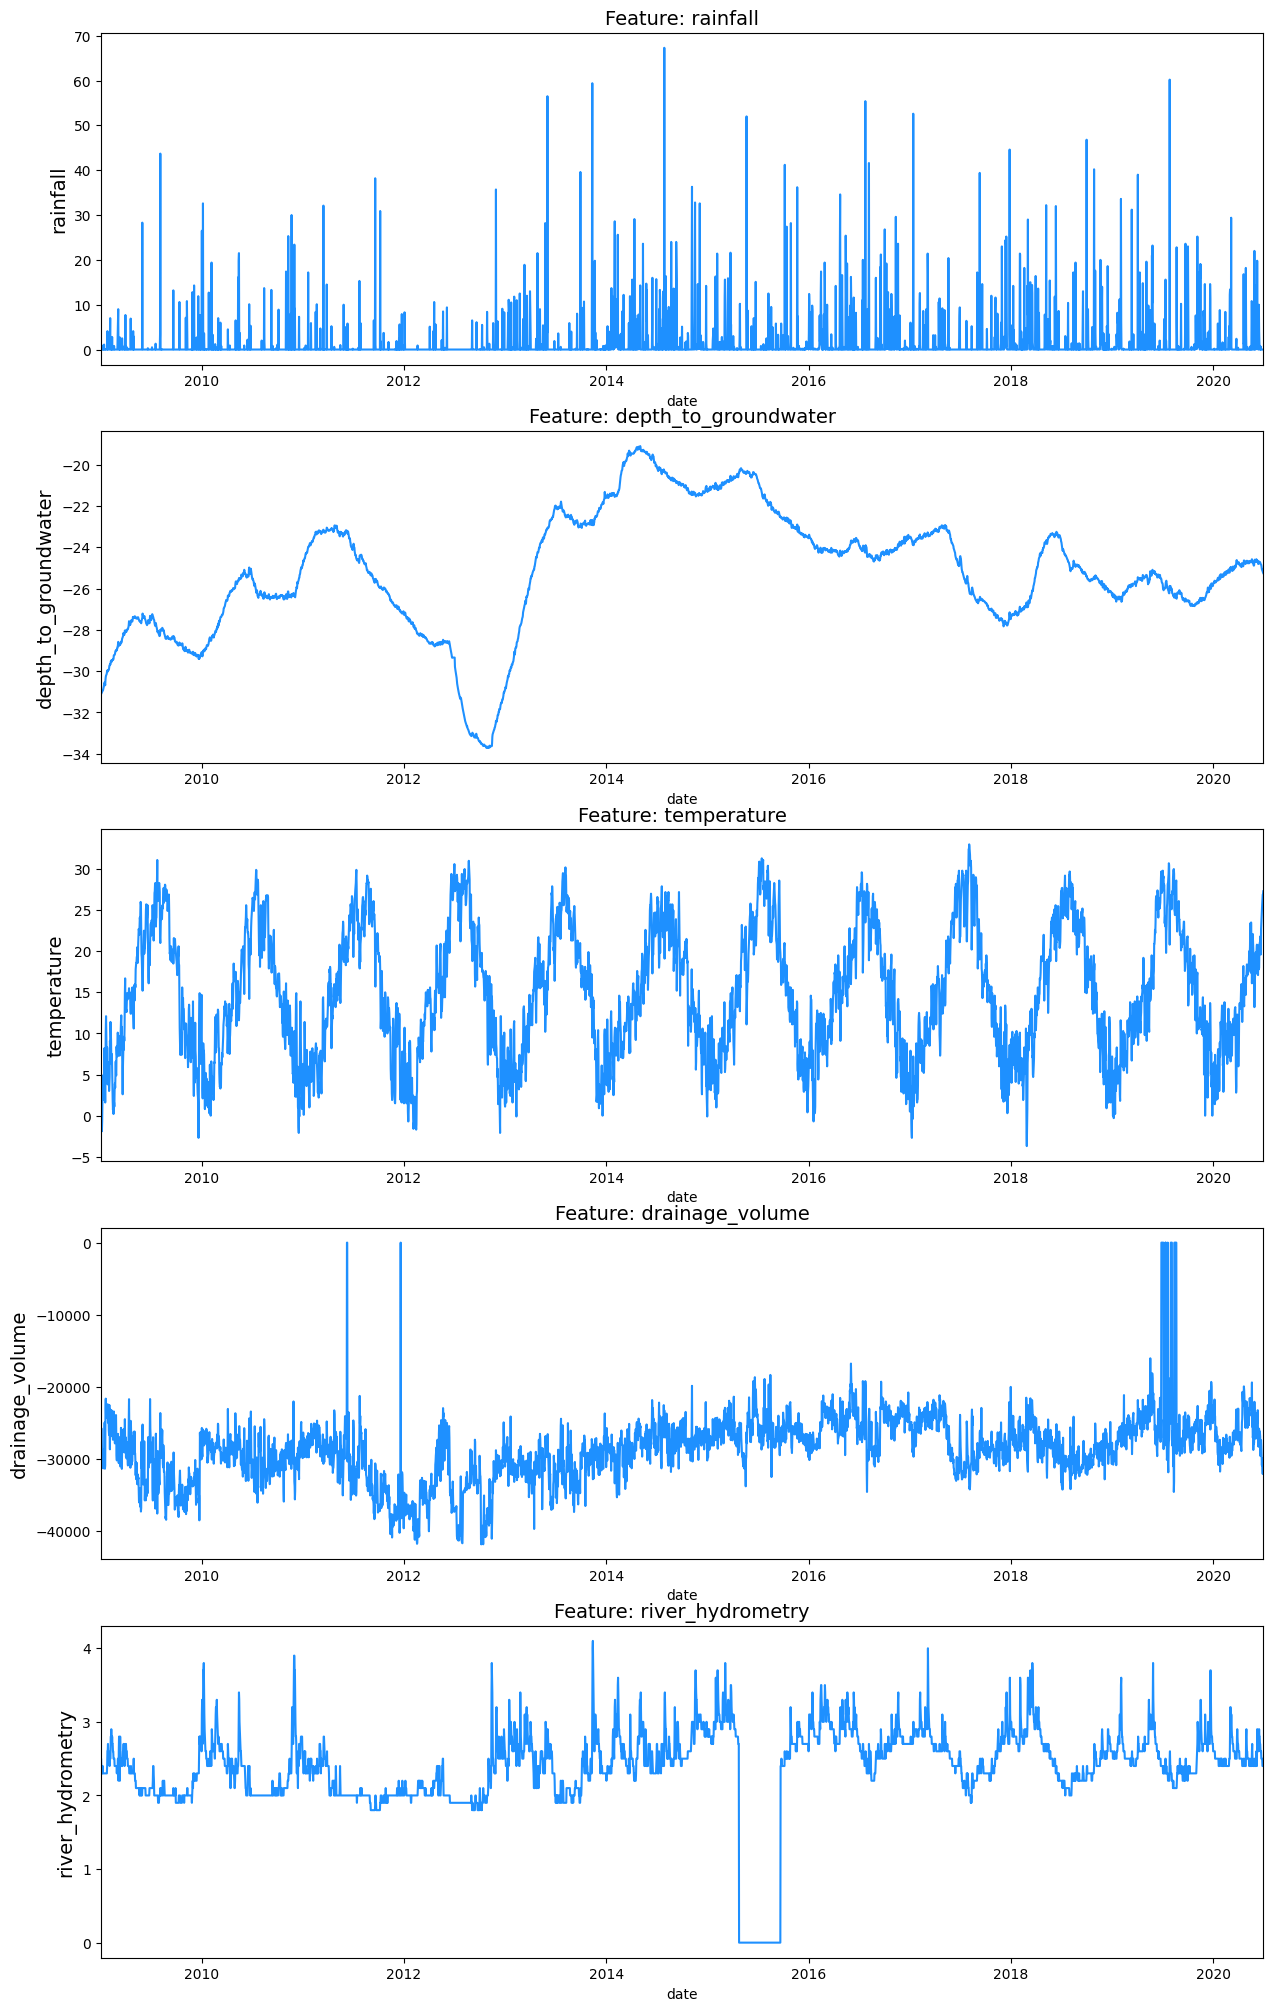

In [7]:
f,ax=plt.subplots(nrows=5 , ncols=1, figsize=(15,25))

for i, column in enumerate(df.drop('date',axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'),ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)

    ax[i].set_xlim([date(2009,1,1), date(2020,6,30)])

2. Data Preprocessing ⚙️

In [8]:
# Chronological Order and Equidistant Timestamps

df= df.sort_values(by='date')


# Check time intervals
df['delta']=df['date']- df['date'].shift(1)

df[['date','delta']].head()

,date,delta
0,2009-01-01,NaT
1,2009-01-02,1 days
2,2009-01-03,1 days
3,2009-01-04,1 days
4,2009-01-05,1 days


In [9]:
df['delta'].sum(), df['delta'].count

(Timedelta('4198 days 00:00:00'),
 <bound method Series.count of 0         NaT
 1      1 days
 2      1 days
 3      1 days
 4      1 days
         ...  
 4194   1 days
 4195   1 days
 4196   1 days
 4197   1 days
 4198   1 days
 Name: delta, Length: 4199, dtype: timedelta64[ns]>)

2.1 Handle Missings

In [10]:
# checking for extra na

df.drop('delta', axis=1)

df.isna().sum()

date                     0
rainfall                 0
depth_to_groundwater    27
temperature              0
drainage_volume          1
river_hydrometry         0
delta                    1
dtype: int64

(14245.0, 18443.0)

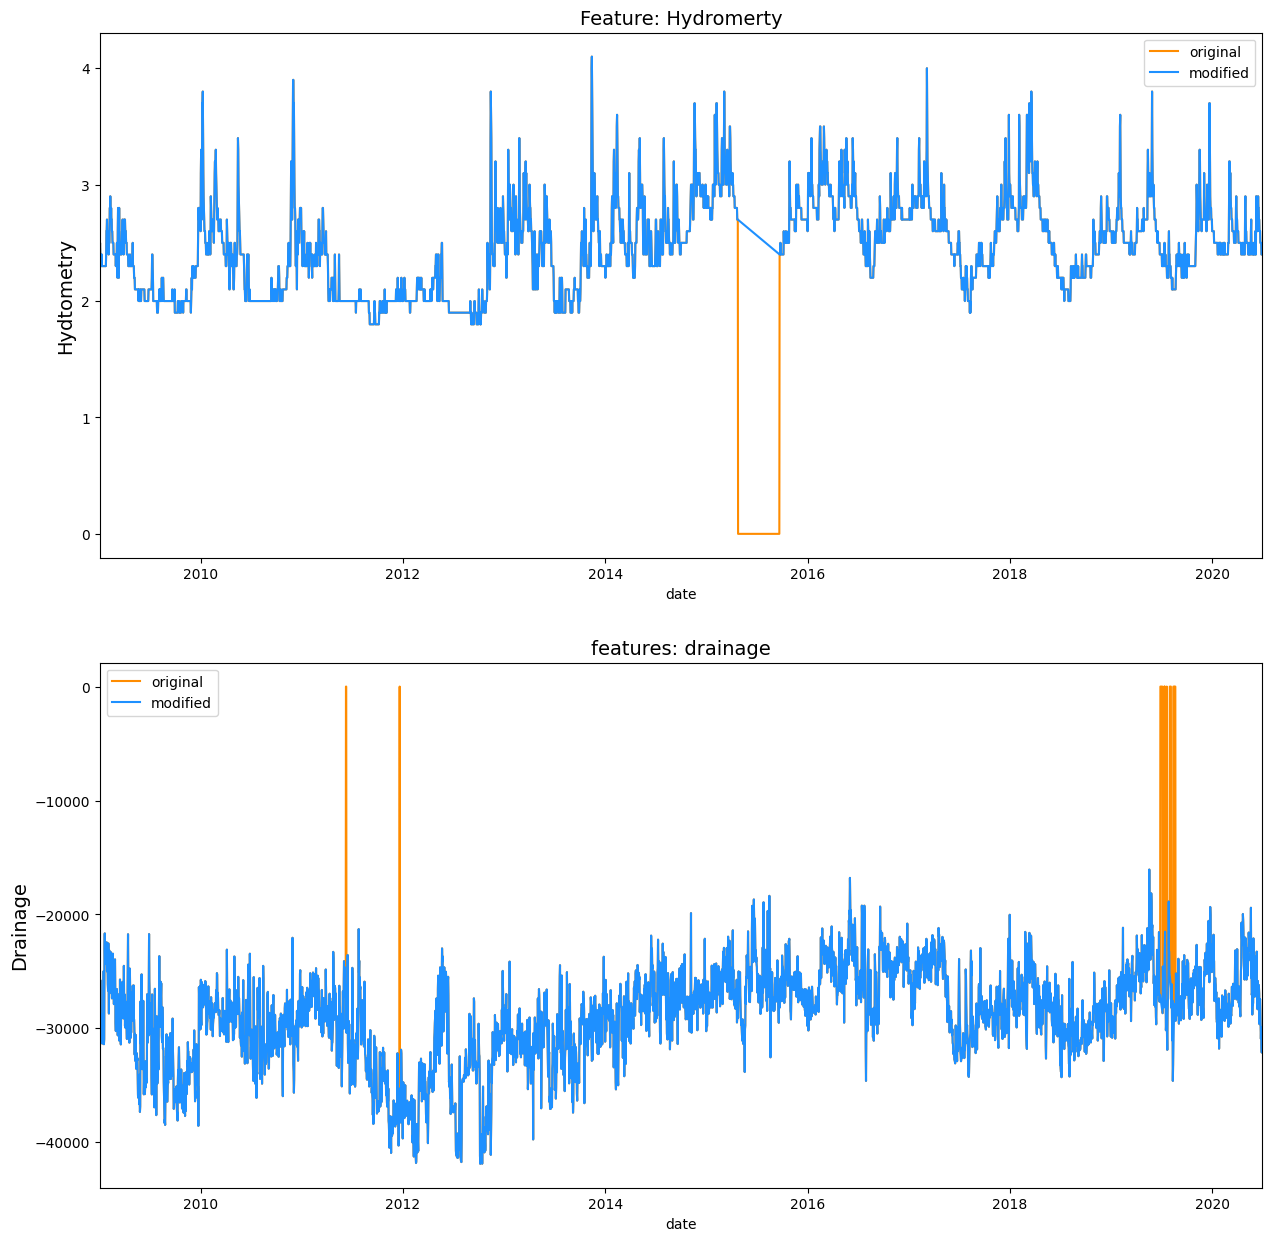

In [11]:
f , ax= plt.subplots(nrows=2,ncols=1, figsize=(15,15))

old_hydrometry= df['river_hydrometry'].copy()
df['river_hydrometry'] = df['river_hydrometry'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_hydrometry, ax=ax[0], color='darkorange',label='original')
sns.lineplot(x=df['date'],  y = df['river_hydrometry'].fillna(np.inf),ax=ax[0],color="dodgerblue", label='modified')
ax[0].set_title('Feature: Hydromerty', fontsize=14)
ax[0].set_ylabel(ylabel ='Hydtometry',fontsize=14)
ax[0].set_xlim([date(2009,1,1), date(2020,6,30)])

old_drainage=df['drainage_volume'].copy()
df['drainage_volume'] = df['drainage_volume'].replace(0, np.nan)

sns.lineplot(x=df['date'], y=old_drainage, ax=ax[1],color='darkorange', label='original')
sns.lineplot(x=df['date'],y=df['drainage_volume'].fillna(np.inf),ax=ax[1] ,color='dodgerblue', label='modified')
ax[1].set_title("features: drainage", fontsize=14)
ax[1].set_ylabel(ylabel='Drainage', fontsize=14)
ax[1].set_xlim([date(2009,1,1), date(2020,6,30)])

fix missing values.

AttributeError: 'YTick' object has no attribute 'label'

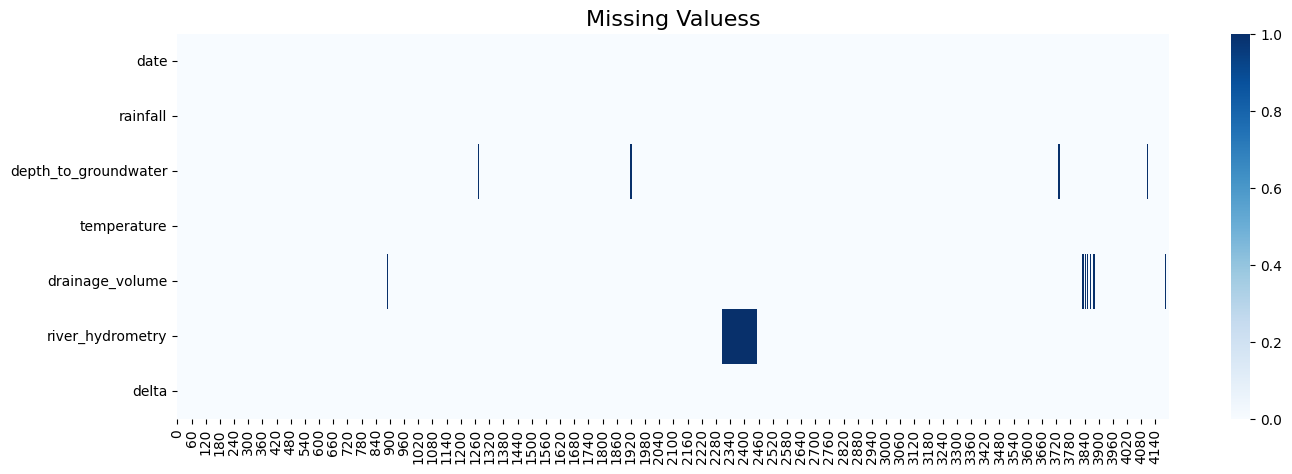

In [12]:
f,ax = plt.subplots(nrows=1, ncols=1, figsize=(16,5))

sns.heatmap(df.T.isna(), cmap= 'Blues')
ax.set_title('Missing Valuess', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

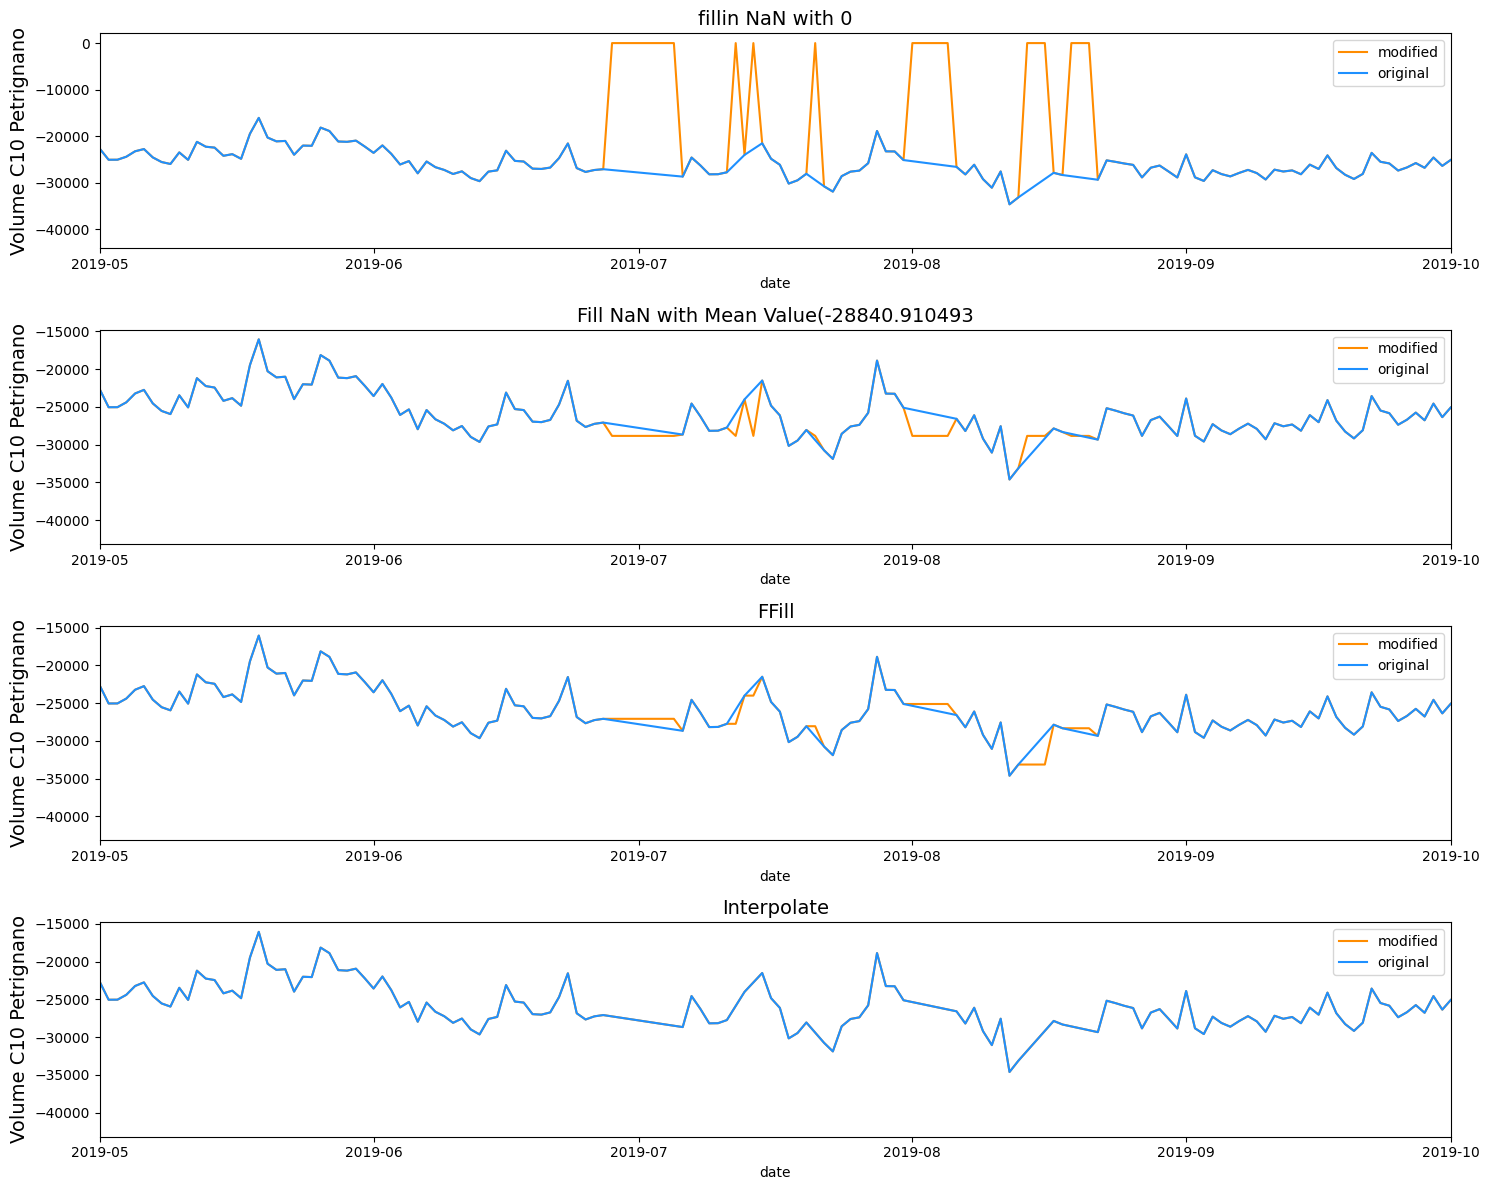

In [ ]:
# fixing / filling Missing Values

f,ax = plt.subplots(nrows=4,ncols=1, figsize=(15,12))

sns.lineplot(x=df['date'],y=df['drainage_volume'].fillna(0),ax=ax[0],color='darkorange', label ='modified') 
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf),ax=ax[0],color='dodgerblue',label='original')
ax[0].set_title('fillin NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='Volume C10 Petrignano',fontsize=14) 

mean_drainage=df['drainage_volume'].mean()
sns.lineplot(x=df['date'],y=df['drainage_volume'].fillna(mean_drainage),ax=ax[1],color='darkorange', label ='modified') 
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf),ax=ax[1],color='dodgerblue',label='original')
ax[1].set_title(f'Fill NaN with Mean Value({mean_drainage:0f}', fontsize=14)
ax[1].set_ylabel(ylabel='Volume C10 Petrignano',fontsize=14) 


sns.lineplot(x=df['date'],y=df['drainage_volume'].ffill(),ax=ax[2],color='darkorange', label ='modified') 
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf),ax=ax[2],color='dodgerblue',label='original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='Volume C10 Petrignano',fontsize=14) 

sns.lineplot(x=df['date'],y=df['drainage_volume'].interpolate(),ax=ax[3],color='darkorange', label ='modified') 
sns.lineplot(x=df['date'], y=df['drainage_volume'].fillna(np.inf),ax=ax[3],color='dodgerblue',label='original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='Volume C10 Petrignano',fontsize=14) 


for i in range(4):
    ax[i].set_xlim([date(2019,5,1), date(2019,10,1)])

plt.tight_layout()
plt.show()


In [ ]:
#  interplota missing values

df['drainage_volume']= df['drainage_volume'].interpolate()
df['river_hydrometry']=df['river_hydrometry'].interpolate()
df['depth_to_groundwater']=df['depth_to_groundwater'].interpolate()

Smoothing data/resampling

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

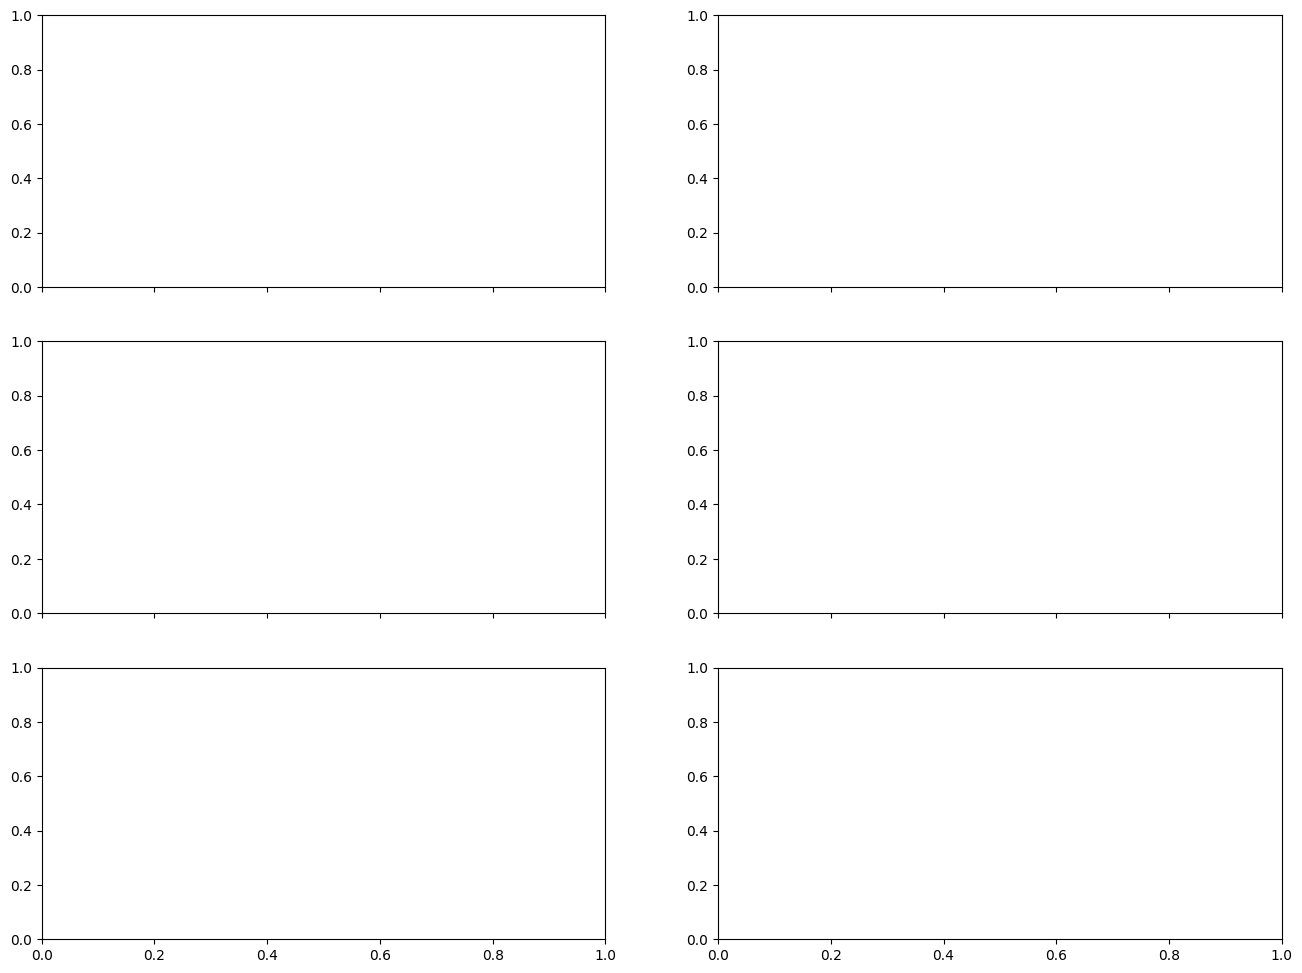

In [ ]:
fig,ax=plt.subplots(ncols=2, nrows=3,sharex=True, figsize=(16,12))

sns.lineplot(df['date'], df['drainage_volume'], color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Drainage Volume', fontsize=14)

resampled_df=df[['date', 'drainage_volume']].resample('7D',on='date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['date'],resampled_df['drainage_volume'],color='dodgerblue',ax=ax[1,0])
ax[1,0].set_title('Weekly drainage volume', fontsize=14)

resampled_df=df[['date' ,'drainage']].resample('M',on='date').sum().reset_index(drop=False)
sns.lineplot(resampled_df['date'],resampled_df['drainage_volume'],color='dodgerblue',ax=ax[2,0])
ax[2,0].set_title('monthly drainage volume',fontsize=14)

for i in range(3):
    ax[i,0].set_xlim([date(2009, 1, 1), date(2020 ,6,30)])

sns.lineplot(['date', 'temperature'], color='dodgerblue',ax=ax[0,1])
ax[0,1].set_title('Daily Temperature (Acc.)',fontsize=14)

resampled_df =df[['date','temperature']].resample('7D',on='date').mean().reset_index(drop=False)
sns.lineplot(resampled_df['date'],resampled_df['temperature'], color='dodgerblue', ax=ax[1,1])
ax[1,1].set_title('weekly temperature(ACc)',fontsize=14)

resampled_df=df[['date','temperature']].resample('M',on='date').mean().reset_index(drop=False)
sns.lineplot(resampled_df['date'],resampled_df ['temperature'], color='dodgerblue', ax=ax[2,1])
ax[2,1].set_title('monthly temperature(acc)',fontsize=14)

for i in range(3):
    ax[i,1].set_xlim([date(2009,1,1), date(2020,6,30)])
plt.show()


In [ ]:
downsample=df[['date',
               'depth_to_groundwater',
               'temperature',
               'drainage_volume',
               'river_hydrometry',
               'rainfall'
               ]].resample('7D', on= 'date').mean().reset_index(drop=False)


df = downsample.copy()

2.3 Staionary?

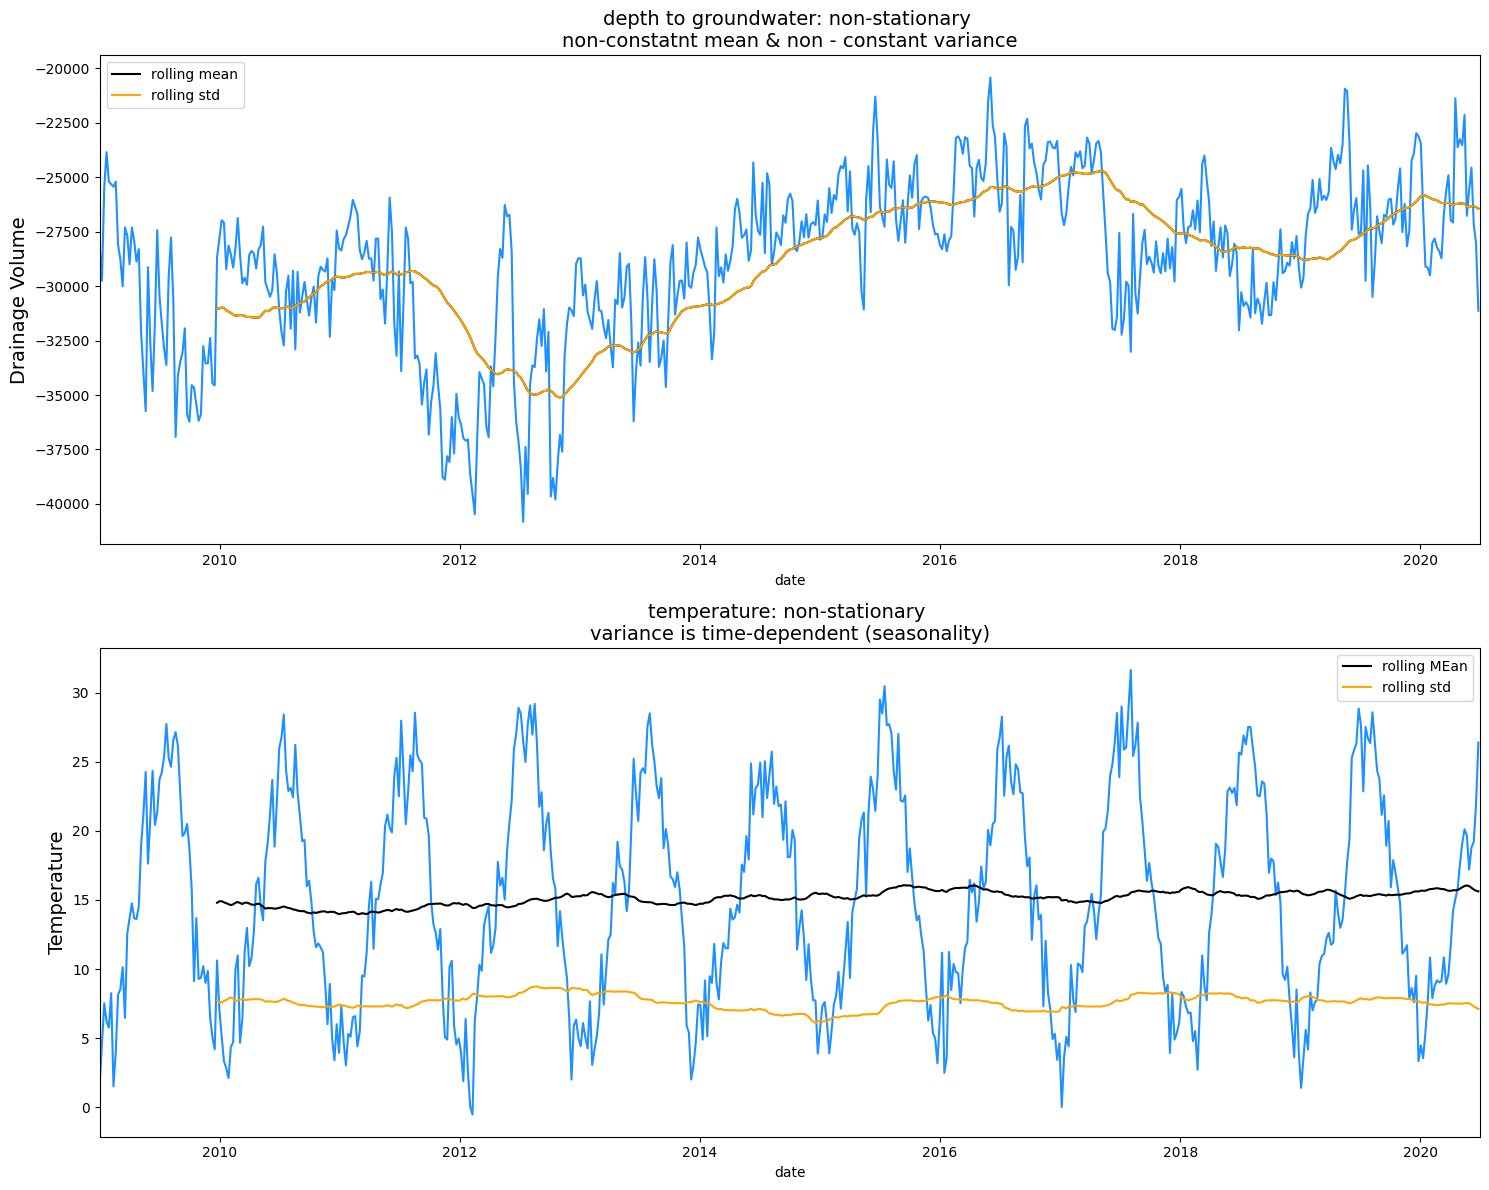

In [ ]:
#  the year has 52 weeks (52 weeks * 7 days per week) aporx.

rolling_window=52
f,ax = plt.subplots(nrows=2 , ncols=1,figsize=(15,12))
sns.lineplot(x=df['date'], y=df['drainage_volume'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=df['date'],y=df['drainage_volume'].rolling(rolling_window).mean(),ax=ax[0],color='black', label='rolling mean')
sns.lineplot(x=df['date'],y=df['drainage_volume'].rolling(rolling_window).mean(),ax=ax[0],color='orange',label='rolling std')
ax[0].set_title('depth to groundwater: non-stationary \nnon-constatnt mean & non - constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='Drainage Volume', fontsize=14)
ax[0].set_xlim([date(2009,1,1), date(2020,6,30)])

sns.lineplot(x=df['date'], y=df ['temperature'], ax=ax[1],color='dodgerblue')
sns.lineplot(x=df['date'],y=df['temperature'].rolling(rolling_window).mean(),ax=ax[1],color='black',label='rolling MEan')
sns.lineplot(x=df['date'], y=df['temperature'].rolling(rolling_window).std(),ax=ax[1], color='orange',label='rolling std')

ax[1].set_title('temperature: non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)
ax[1].set_xlim([date(2009,1,1), date(2020,6,30)])

plt.tight_layout()
plt.show()



2.3.1 Augmented Dickey-Fuller (ADF)



In [ ]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['depth_to_groundwater'].values)
result

(-2.8802016493166605,
 0.047699190920208856,
 7,
 592,
 {'1%': -3.441444394224128,
  '5%': -2.8664345376276454,
  '10%': -2.569376663737217},
 -734.3154255877616)

In [ ]:
# Check the range of the ADF statistic compared with critical_values and The p-value is less than 0.05

f,ax = plt.subplots(nrows=3,ncols=2,figsize=(15, 9))

def visualize_adfuller_results(series, title,ax)
    results=adfuller(series)
    significance_level=0.05
    adf_stat= result[0]
    p_val=result[1]
    crit_val_1=result[4]['1%']
    crit_val_5=result[4]['5%']
    crit_val_10=result[4]['10%']

    if(p_val<significance_level)& ((adf_stat < crit_val_1)):
        linecolor='forestgreen'
    elif(p_val<significance_level)&((adf_stat<crit_val_5)):
        linecolor='orange'
    elif(p_val<significance_level)&((adf_stat<crit_val_10)):
        linecolor='red'
    else:
        linecolor='purple'

    sns.lineplot(x=df['date'], y=series,ax=ax,color=linecolor)
    ax.set_title (f'ADF stats{adf_stat:0.3f},p-valies:{p_val:0.3f}\nCrictical values 1%:{crit_val_1: 0.3f},5%:{crit_val_5:0.3f},10%:{crit_val_10:0.3f}', fontsize=14) 
    ax.set_ylabel(ylabel=title,fontsize=14)  

    visualize_adfuller_results(df['rainfall'].values,'Rainfall',ax[0,0])
    visualize_adfuller_results(df['temperature'].values,'temperature',ax[1,0])
    visualize_adfuller_results(df)